# Scraping Coinmarketcap

I'll will scrape the URL: https://coinmarketcap.com/all/views/all/. This website contains information about cryptocurrencies such as their current prices, circulation supply, volume, etc.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import re
import scrapy
from scrapy.crawler import CrawlerProcess
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create a spider
class coinSpider(scrapy.Spider):
    # naming the spider
    name = "coinSpider"
    
    # URL to start with.
    start_url = ['https://coinmarketcap.com/all/views/all/']

    # XPath to parse the response
    def parse(self, response):
        # iterate over every <tr> element in the tbody section.
        for row in response.xpath('.//tbody/tr'):
            yield {
                # This is the code to choose what we want to extract
                # You can modify this with other Xpath expressions to extract other information from the site
                'name': row.xpath('td[2]/a/text()').extract_first(),
                'price': row.xpath('td[5]/a/text()').extract_first(),
                'supply': row.xpath('td[6]/span/text()').extract_first(),
                'volume': row.xpath('td[7]/a/text()').extract_first()
                  }

# defining parameters for crawler
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # store data in JSON format
    'FEED_URI': 'coins_market.json',  # same the storage file
    'LOG_ENABLED': False           # turn off logging
})

# start the crawler with spider.
process.crawl(coinSpider)
process.start()
print('Done!')

Done!


In [3]:

# Checking whether we got data 
coins_df=pd.read_json(r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 5\coins_market.json', orient='records')
print(coins_df.shape)
coins_df.head()

(2141, 4)


,name,price,supply,volume
0,Bitcoin,$5356.81,"17,674,775","$13,745,871,947"
1,Ethereum,$161.89,"105,878,855","$6,249,981,697"
2,XRP,$0.310485,"42,004,966,728","$1,213,735,325"
3,Bitcoin Cash,$262.05,"17,757,225","$1,659,791,847"
4,Litecoin,$74.33,"61,570,158","$2,988,790,999"


## Data Cleaning

In [4]:
coins_df.price = coins_df.price.apply(lambda x: x.replace('$','')).astype('float')
coins_df.volume = coins_df.volume.apply(lambda x: x.replace('$',''))
coins_df.supply = coins_df.supply.apply(lambda x: x.replace('?',''))

In [5]:
coins_df.head()

,name,price,supply,volume
0,Bitcoin,5356.810000,"17,674,775","13,745,871,947"
1,Ethereum,161.890000,"105,878,855","6,249,981,697"
2,XRP,0.310485,"42,004,966,728","1,213,735,325"
3,Bitcoin Cash,262.050000,"17,757,225","1,659,791,847"
4,Litecoin,74.330000,"61,570,158","2,988,790,999"


              price
count  2.141000e+03
mean   3.030046e+01
std    5.734435e+02
min    4.500000e-09
5%     4.200000e-05
25%    1.128000e-03
50%    7.564000e-03
75%    5.350500e-02
95%    1.340000e+00
100%   1.981167e+04
max    1.981167e+04


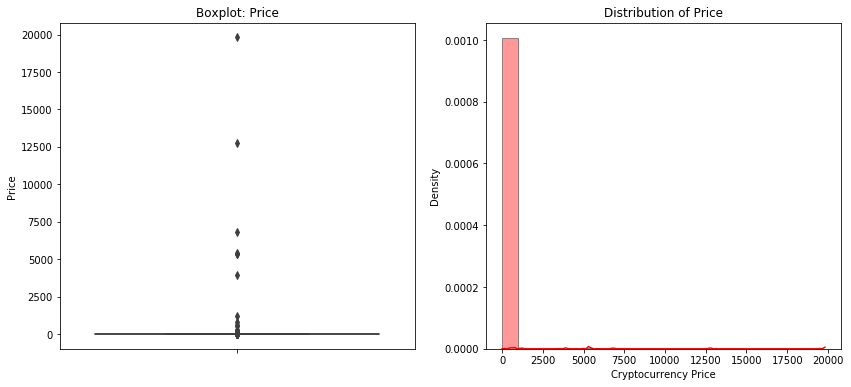

In [6]:
# price distribution
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,6))
_ = sns.boxplot(y = ['price'], data = coins_df, ax = ax1)
_.set(ylabel = 'Price', title = 'Boxplot: Price')
_ = sns.distplot(coins_df['price'], hist = True, kde = True, ax = ax2, color = 'r', hist_kws={'edgecolor':'black'}, bins = 20)
_.set(xlabel = 'Cryptocurrency Price', ylabel = 'Density', title = 'Distribution of Price')
print(coins_df.describe(percentiles = [0.05, .25, 0.5, 0.75, 0.95, 1]))

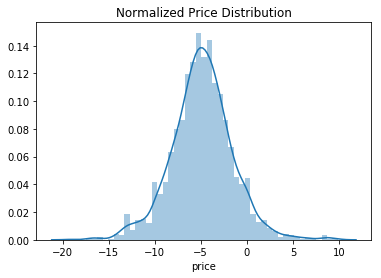

In [7]:
_ = sns.distplot(np.log(coins_df['price']))
_.set(title = 'Normalized Price Distribution')
plt.show()